In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler

In [169]:
house_data = pd.read_csv("dataSet/train.csv")

In [170]:
df = pd.DataFrame(house_data)

In [171]:
y_train = df["PRICE"].to_numpy().reshape(-1,1)
x_train = df["PROPERTYSQFT"].to_numpy().reshape(-1,1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
y_scaled = scaler.fit_transform(y_train)

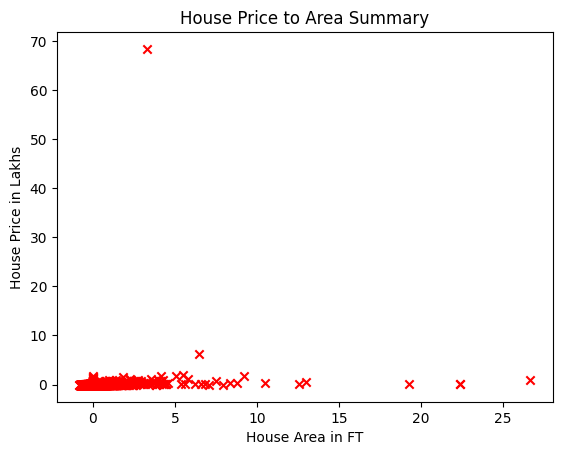

In [172]:
plt.scatter(x_scaled, y_scaled, marker="x", c="r")
plt.title("House Price to Area Summary")
plt.xlabel("House Area in FT")
plt.ylabel("House Price in Lakhs")
plt.show()

In [173]:
def compute_cost(x,y,w,b):
    
    m = x.shape[0]
    total = 0 
    
    # for i in range(0,m):
    #     fw_b = w*x[i] + b
    #     total += (fw_bi - y[i]) ** 2
        
    fw_b = w * x + b
    error = fw_b - y
    total = np.sum(error ** 2)
    cost_fn = (1 / (2 * m)) * total
    return cost_fn
    

In [174]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost}')

<class 'numpy.float64'>
Cost at initial w: 494224122690776.3


In [175]:
def compute_gradient(x,y,w,b):
    dJ_dw = 0
    dJ_db = 0
    m = x.shape[0]
    
    for i in range(m):
        dJ_dw += (w*x[i] + b - y[i]) * x[i]
        dJ_db += w*x[i] + b - y[i]

    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

In [179]:
def gradient_descent(x, y, w, b, cost_func, gradient_func, alpha, iteration):

    m = x.shape[0]
    
    for i in range(iteration):
        dJ_dw, dJ_db = gradient_func(x, y, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        if i < 100000:
            cost = cost_func(x, y, w, b)

        if i% math.ceil(iteration/10) == 0:
            print(f"Iteration {i:4}: Cost {cost}   ")
        
    return w, b

In [180]:
initial_w = 1
initial_b = 1
alpha = 0.001
iteration = 10000
w, b = gradient_descent(x_scaled, y_scaled, initial_w, initial_b, compute_cost, compute_gradient, alpha, iteration)
print(w)
print(b)

Iteration    0: Cost 1.3873216079685255   
Iteration 1000: Cost 0.6146488864146991   
Iteration 2000: Cost 0.5101835921039394   
Iteration 3000: Cost 0.49605989210649676   
Iteration 4000: Cost 0.49415036892050584   
Iteration 5000: Cost 0.49389220152821495   
Iteration 6000: Cost 0.4938572973160372   
Iteration 7000: Cost 0.4938525782691547   
Iteration 8000: Cost 0.4938519402543684   
Iteration 9000: Cost 0.493851853994817   
[0.11092893]
[4.5173346e-05]


In [193]:
m = x_scaled.shape[0]
predicted = np.zeros(m)

predicted = w * x_scaled + b

print(predicted)

[[-3.65535838e-02]
 [ 7.16928959e-01]
 [-7.85170928e-03]
 ...
 [ 4.51733573e-05]
 [-7.13225212e-02]
 [-6.68888983e-02]]


Text(0, 0.5, 'Price')

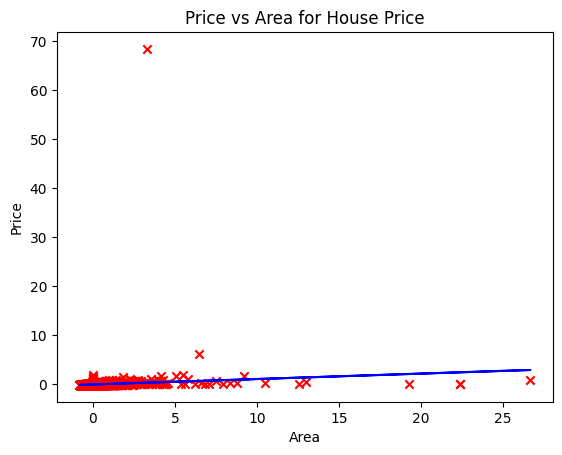

In [194]:
plt.plot(x_scaled, predicted, c="b")
plt.scatter(x_scaled, y_scaled, marker="x", c="r")
plt.title("Price vs Area for House Price")
plt.xlabel("Area")
plt.ylabel("Price")

In [197]:
model_predict = float(input("Enter house area here: "))
scaled_input = scaler.transform(np.array([[model_predict]]))
predicted_scaled_price = w * scaled_input + b
predicted_price = scaler.inverse_transform(predicted_scaled_price)

print(f"Your Predicted House Price is: {predicted_price[0][0]}")

Enter house area here:  1400


Your Predicted House Price is: 2097058.8879166688
